In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df =  pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')

merged_df = merged_df.rename(columns={'Age_months': 'Age (months)'})
# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [27]:
# Checking the number of mice.
num_mice = merged_df['Mouse ID'].nunique()
print(f"Number of mice: {num_mice}")


Number of mice: 249


In [87]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicates["Mouse ID"].unique()
print("Duplicate Mouse IDs:", duplicate_mouse_ids)
print("dtype:", duplicate_mouse_ids.dtype)

Duplicate Mouse IDs: ['g989']
dtype: object


In [422]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_df[merged_df["Mouse ID"].isin(duplicate_mouse_ids)]

# Print the data for duplicate Mouse IDs
print("All data for duplicate Mouse IDs:")
(duplicate_mouse_data)

All data for duplicate Mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
586,g989,0,45.000000,0,Propriva,Female,21,26
587,g989,0,45.000000,0,Propriva,Female,21,26
588,g989,5,48.786801,0,Propriva,Female,21,26
589,g989,5,47.570392,0,Propriva,Female,21,26
590,g989,10,51.745156,0,Propriva,Female,21,26
591,g989,10,49.880528,0,Propriva,Female,21,26
592,g989,15,51.325852,1,Propriva,Female,21,26
593,g989,15,53.442020,0,Propriva,Female,21,26
594,g989,20,55.326122,1,Propriva,Female,21,26
595,g989,20,54.657650,1,Propriva,Female,21,26


In [137]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merged_df[~merged_df["Mouse ID"].isin(duplicate_mouse_ids)]

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
cleaned_df.head()

Cleaned DataFrame:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age (months),Weight (g)
0,a203,0,45.000000,0,Infubinol,Female,20,23
1,a203,5,48.508468,0,Infubinol,Female,20,23
2,a203,10,51.852437,1,Infubinol,Female,20,23
3,a203,15,52.777870,1,Infubinol,Female,20,23
4,a203,20,55.173336,1,Infubinol,Female,20,23


In [135]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = cleaned_df["Mouse ID"].nunique()

# Print the result
print(f"Number of unique mice in the cleaned DataFrame: {number_of_mice}")


Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [169]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_df = cleaned_df.groupby('Drug Regimen')
mean=drug_regimen_df['Tumor Volume (mm3)'].mean()
median=drug_regimen_df['Tumor Volume (mm3)'].median()
variance=drug_regimen_df['Tumor Volume (mm3)'].var()
std_dev=drug_regimen_df['Tumor Volume (mm3)'].std()
sem=drug_regimen_df['Tumor Volume (mm3)'].sem()
summary_statistics=pd.DataFrame({'Mean Tumor Volume':mean,'Median Tumor Volume':median,'Tumor Volume Variance':variance,'Tumor Volume Std. Dev':std_dev,
                                 'Tumor Volume Std. Err.':sem})
summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [195]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Group by drug regimen and calculate the summary statistics for tumor volume
summary_stats = cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean_Tumor_Volume='mean',
    Median_Tumor_Volume='median',
    Tumor_Volume_Variance='var',
    Tumor_Volume_Std_Dev='std',
    Tumor_Volume_Std_Err='sem'
)
summary_stats_agg = summary_stats.rename(columns={
    'Mean_Tumor_Volume': 'Mean Tumor Volume',
    'Median_Tumor_Volume': 'Median Tumor Volume',
    'Tumor_Volume_Variance': 'Tumor Volume Variance',
    'Tumor_Volume_Std_Dev': 'Tumor Volume Std. Dev',
    'Tumor_Volume_Std_Err': 'Tumor Volume Std. Err.'
})
# Print the summary statistics table
print("Summary Statistics for Tumor Volume by Drug Regimen:")
summary_stats_agg


Summary Statistics for Tumor Volume by Drug Regimen:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [203]:
# Calculate number of mice per Drug Regimen
# Group by 'Drug Regimen' and count the number of unique 'Mouse ID' for each regimen
mice_per_regimen = drug_regimen_df['Mouse ID'].count().sort_values(ascending=False)
mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

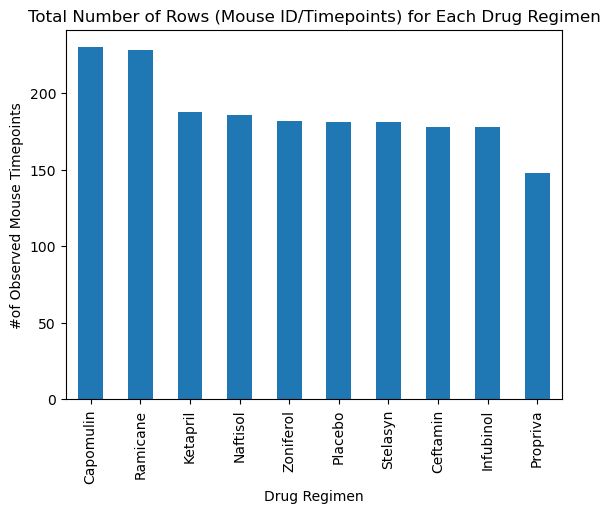

In [212]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

mice_per_regimen.plot(kind='bar')

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('#of Observed Mouse Timepoints')

# Show the plot
plt.show()



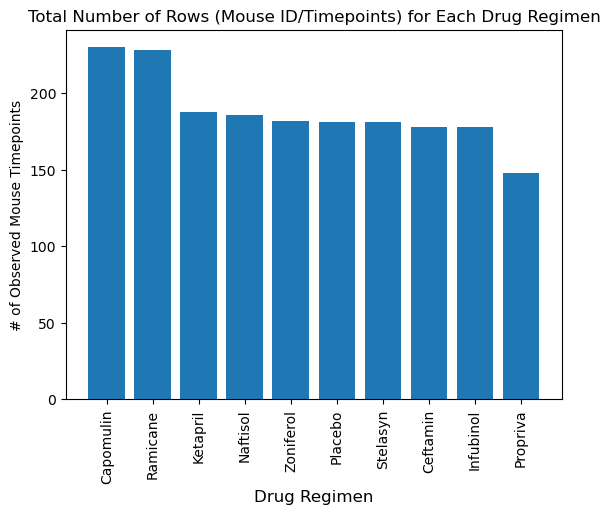

In [270]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create the bar plot using Matplotlib's plt.bar()
plt.bar(mice_per_regimen.index,row_counts)

# Add title and labels
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('# of Observed Mouse Timepoints')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()
        

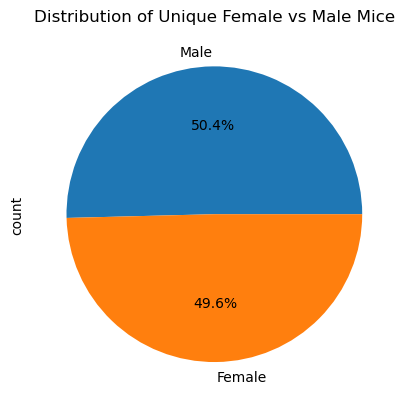

In [308]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice by 'Mouse ID' and their 'Gender'
unique_mice = cleaned_df[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')  # Hide the y-axis label as it's not necessary for a pie chart
plt.show()

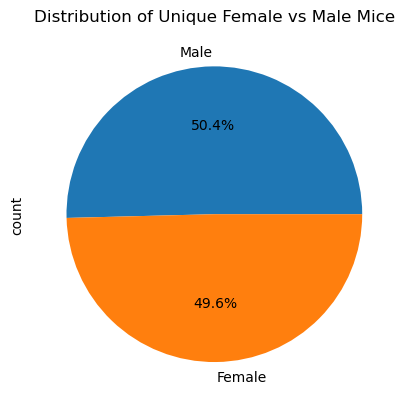

In [306]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice by 'Mouse ID' and their 'Sex'
unique_mice = cleaned_df[['Mouse ID', 'Sex']].drop_duplicates()

# Get the unique mice with their gender
gender_counts = unique_mice['Sex'].value_counts()

# # Make the pie chart using Matplotlib
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Unique Female vs Male Mice')
plt.ylabel('count')
plt.show()

## Quartiles, Outliers and Boxplots

In [328]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint_df = cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# 2. Merge this with the original DataFrame to get the tumor volume at the last timepoint
# We merge on 'Mouse ID' and 'Timepoint' to get the corresponding tumor volume for the last timepoint
final_tumor_volume_df = pd.merge(last_timepoint_df, cleaned_df, on=['Mouse ID', 'Timepoint'], how='left')

# 3. Filter the dataset for the four treatment regimens # Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume_df_filtered = final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'].isin(treatment_regimens)]

# 4. Display the results (Mouse ID, Drug Regimen, Final Tumor Volume)
final_tumor_volume_df_filtered = final_tumor_volume_df_filtered[['Mouse ID', 'Drug Regimen','Timepoint','Tumor Volume (mm3)']]

# Display the final DataFrame with the last tumor volumes for each mouse in the four treatment regimens
final_tumor_volume_df_filtered.head()



,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
0,a203,Infubinol,45,67.973419
1,a251,Infubinol,45,65.525743
3,a275,Ceftamin,45,62.999356
6,a411,Ramicane,45,38.407618
7,a444,Ramicane,45,43.047543


In [346]:
# Put treatments into a list for for loop (and later for plot labels)
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # Add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq - lowerq    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

    # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound, 2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound, 2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean, 2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')


Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin

C:\Users\shara\AppData\Local\Temp\ipykernel_1440\364638252.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=regimen,flierprops={'markerfacecolor':'r','markersize': 10})


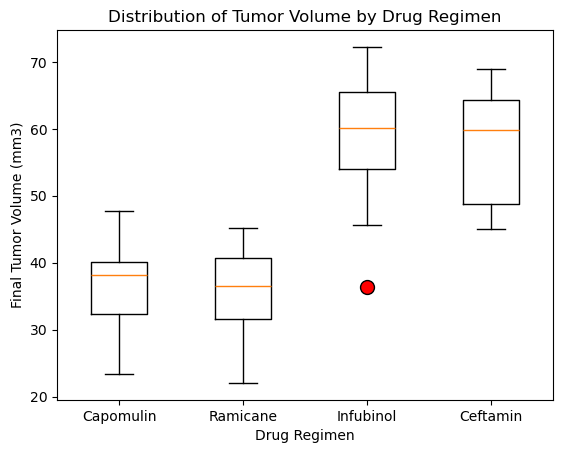

In [366]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

# Prepare the data for box plot
data = [final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] for drug in regimen]

# Create a box plot
plt.boxplot(data, labels=regimen,flierprops={'markerfacecolor':'r','markersize': 10})

# Add title and labels
plt.title('Distribution of Tumor Volume by Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')

# Show the plot
plt.show()


## Line and Scatter Plots

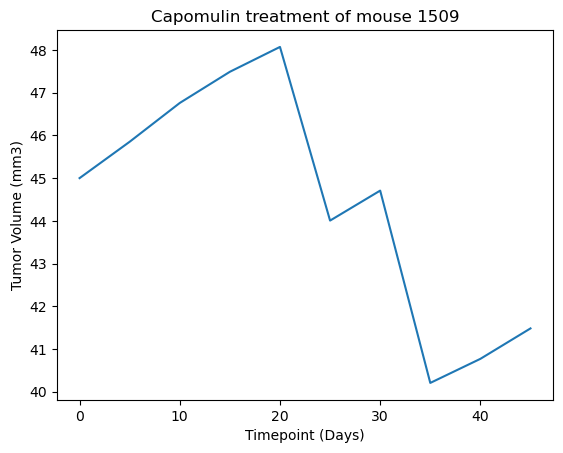

In [400]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'l509'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
ime_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'])

# Set x/y label, title
plt.title(f"Capomulin treatment of mouse 1509")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

# Present the box plot chart
plt.show()


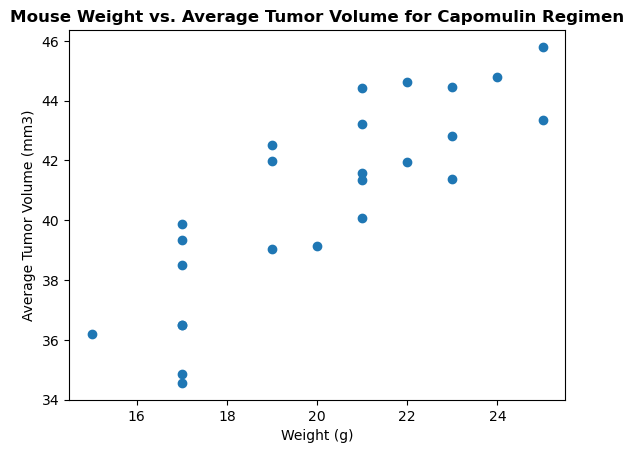

In [406]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin regimen
Capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get the average tumor volume for each mouse
avg_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight data
mouse_weight = Capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = avg_tumor_volume.reset_index().merge(mouse_weight, on='Mouse ID')

# Generate a scatter plot of mouse weight vs. average tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')

# Set title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontweight='bold')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation coefficient between mouse weight and average tumor volume: 0.84


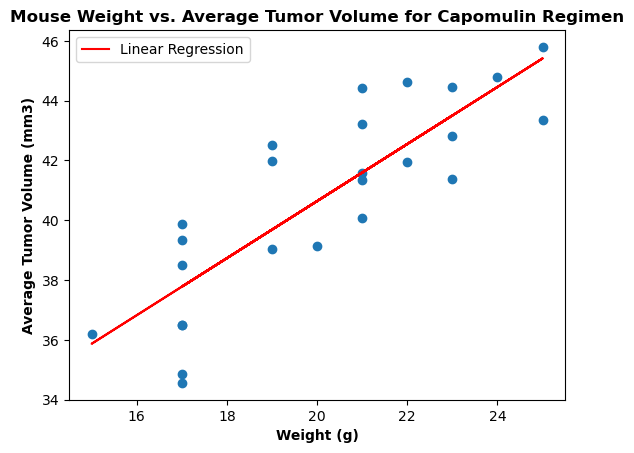

Linear regression equation: y = 0.95x + 21.55
R-squared value: 0.71


In [420]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for Capomulin regimen
Capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']

# Group by Mouse ID to get the average tumor volume for each mouse
avg_tumor_volume = Capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume with the mouse weight data
mouse_weight = Capomulin_df[['Mouse ID', 'Weight (g)']].drop_duplicates()
merged_data = avg_tumor_volume.reset_index().merge(mouse_weight, on='Mouse ID')

# Scatter plot of mouse weight vs. average tumor volume
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')

# Calculate the correlation coefficient
correlation = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])
print(f"The correlation coefficient between mouse weight and average tumor volume: {round(correlation, 2)}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Plot the regression line
regression_line = slope * merged_data['Weight (g)'] + intercept
plt.plot(merged_data['Weight (g)'], regression_line, color='r', label='Linear Regression')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Show the plot with the regression line
plt.legend(loc='best')
plt.show()

# Print out the linear regression parameters
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.2f}")
